## INTRODUCTION
- It’s a Python based scientific computing package targeted at two sets of audiences:
    - A replacement for NumPy to use the power of GPUs
    - Deep learning research platform that provides maximum flexibility and speed
- pros: 
    - Interactively debugging PyTorch. Many users who have used both frameworks would argue that makes pytorch significantly easier to debug and visualize.
    - Clean support for dynamic graphs
    - Organizational backing from Facebook
    - Blend of high level and low level APIs
- cons:
    - Much less mature than alternatives
    - Limited references / resources outside of the official documentation
- I accept you know neural network basics. If you do not know, you should learn the basics first of all.  Because I will not explain neural network concepts detailed, I only explain how to use pytorch for neural network
<br>
<br> **Content:**
0. [Introduction to ANN](#0)
1. [Import necessary Libraries](#1)
1. [Prepare Dataset](#2)
1. [Create ANN Model](#3)
1. [ANN model training](#4)
1. [visualization loss](#5)
1. [visualization accuracy](#6)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


<a id="0"></a> <br>
### Artificial Neural Network (ANN)
- Logistic regression is good at classification but when complexity(non linearity) increases, the accuracy of model decreases.
- Therefore, we need to increase complexity of model.
- In order to increase complexity of model, we need to add more non linear functions as hidden layer. 
- What we expect from artificial neural network is that when complexity increases, we use more hidden layers and our model can adapt better. As a result accuracy increase.
- **Steps of ANN:**
    1. Import Libraries

    1. Prepare Dataset

    1. Create ANN Model
        - We add 3 hidden layers.
        - We use ReLU, Tanh and ELU activation functions for diversity.
    1. Instantiate Model Class
        - input_dim = 28*28 # size of image px*px
        - output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9
        - Hidden layer dimension is 150. I only choose it as 150 there is no reason. Actually hidden layer dimension is hyperparameter and it should be chosen and tuned. You can try different values for hidden layer dimension and observe the results.
        - create model
    1. Instantiate Loss
        - Cross entropy loss
        - It also has softmax(logistic function) in it.
    1. Instantiate Optimizer
        - SGD Optimizer
    1. Traning the Model
    1. Prediction
- As a result, as you can see from plot, while loss decreasing, accuracy is increasing and our model is learning(training). 
- Thanks to hidden layers model learnt better and accuracy(almost 95%) is better than accuracy of logistic regression model.

<a id="1"></a> <br>
### Import Necessary Libraries

In [2]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

<a id="2"></a> <br>
### Prepare Dataset

In [3]:
# Prepare Dataset
# load data
train = pd.read_csv("../Data/mnist/train.csv",dtype = np.float32)

# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization

# train test split. Size of train data is 80% and size of test data is 20%. 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)


<a id="3"></a> <br>
### Create ANN Model

In [6]:
# Create ANN Model
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        # Linear function 1: 784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()
        
        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.elu3 = nn.ELU()
        
        # Linear function 4 (readout): 150 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)
        
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.elu3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

# instantiate ANN
input_dim = 28*28
hidden_dim = 150 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 10

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

<a id="4"></a> <br>
### ANN model training

In [7]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.7249808311462402  Accuracy: 78.42857360839844 %
Iteration: 1000  Loss: 0.4689807891845703  Accuracy: 87.67857360839844 %
Iteration: 1500  Loss: 0.2275364100933075  Accuracy: 89.35713958740234 %
Iteration: 2000  Loss: 0.27788805961608887  Accuracy: 90.57142639160156 %
Iteration: 2500  Loss: 0.32457053661346436  Accuracy: 91.71428680419922 %
Iteration: 3000  Loss: 0.12611809372901917  Accuracy: 92.42857360839844 %
Iteration: 3500  Loss: 0.26063597202301025  Accuracy: 93.23809814453125 %
Iteration: 4000  Loss: 0.06474649906158447  Accuracy: 93.70237731933594 %
Iteration: 4500  Loss: 0.3392144441604614  Accuracy: 94.25 %
Iteration: 5000  Loss: 0.10345158725976944  Accuracy: 94.60713958740234 %
Iteration: 5500  Loss: 0.20564064383506775  Accuracy: 94.85713958740234 %
Iteration: 6000  Loss: 0.19385765492916107  Accuracy: 95.0952377319336 %
Iteration: 6500  Loss: 0.09950464218854904  Accuracy: 95.51190185546875 %
Iteration: 7000  Loss: 0.12029221653938293  Accuracy: 95

<a id="5"></a> <br>
### visualization loss 

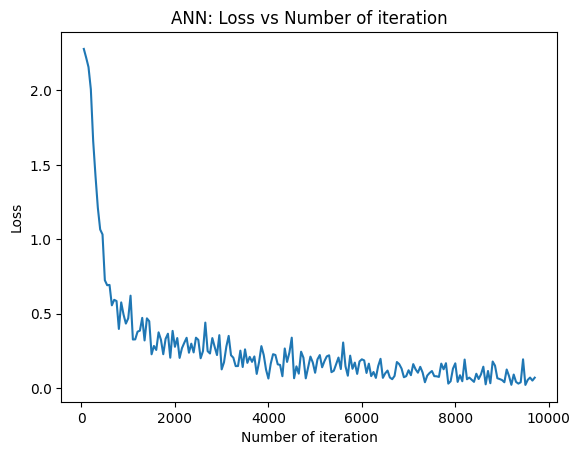

In [8]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

<a id="6"></a> <br>
### visualization accuracy

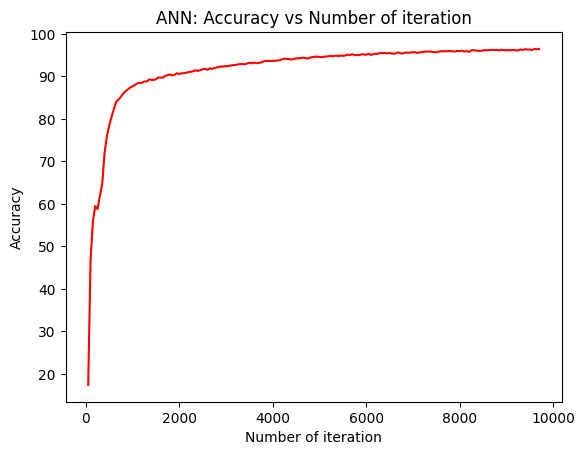

In [9]:
# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()